In [121]:
import pickle
import numpy as np
from sklearn.utils import shuffle
%matplotlib inline

d = pickle.load(open('train_data.p', 'rb'))
train_x = np.array(d['train_x'], dtype=np.float32)
train_y = np.array(d['train_y'])

#train_y[train_y == -1] = 100

train_x, train_y = shuffle(train_x, train_y)
train_x = train_x - 128
train_x = train_x / 128



print('Loaded.')

Loaded.


In [122]:
print(train_x.shape, train_y.shape)

(25000, 32, 32, 3) (25000,)


1 -1 1 1
0.992188 -1.0


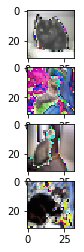

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

print(train_y[500], train_y[501], train_y[502], train_y[503])
print (np.max(train_x), np.min(train_x))

plt.subplot(411)
plt.imshow(train_x[500])
plt.subplot(412)
plt.imshow(train_x[501])
plt.subplot(413)
plt.imshow(train_x[502])
plt.subplot(414)
plt.imshow(train_x[503])



In [138]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Convolution2D(32, 2, 2, border_mode = 'same', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Activation('relu'))

model.add(Convolution2D(64, 2, 2, border_mode = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))


In [139]:
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator

nt = 2000
validation_size = 500

xt = train_x[0:nt]
yt = train_y[0:nt]

xv = train_x[-validation_size:]
yv = train_y[-validation_size:]

print (xt.shape, yt.shape, xv.shape, yv.shape)

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

gen_batches = 10
i = 0
for batch_x, batch_y in datagen.flow(train_x[0:nt], train_y[0:nt], batch_size=100):
    print(batch_x.shape, batch_y.shape)
    if i >= gen_batches: break
    xt = np.concatenate((xt, batch_x), axis=0)
    yt = np.concatenate((yt, batch_y), axis=0)
    i+= 1
    
print (xt.shape, yt.shape, xv.shape, yv.shape)


lb = LabelBinarizer()
yt_one_hot = lb.fit_transform(yt)
yv_one_hot = lb.fit_transform(yv)


(2000, 32, 32, 3) (2000,) (500, 32, 32, 3) (500,)
(100, 32, 32, 3) (100,)
(100, 32, 32, 3) (100,)
(100, 32, 32, 3) (100,)
(100, 32, 32, 3) (100,)
(100, 32, 32, 3) (100,)
(100, 32, 32, 3) (100,)
(100, 32, 32, 3) (100,)
(100, 32, 32, 3) (100,)
(100, 32, 32, 3) (100,)
(100, 32, 32, 3) (100,)
(100, 32, 32, 3) (100,)
(3000, 32, 32, 3) (3000,) (500, 32, 32, 3) (500,)


In [143]:
model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])
history = model.fit(xt, yt_one_hot, nb_epoch=5, validation_split=0.2, shuffle=True)
model.save_weights('cat_w.h5')


Train on 2400 samples, validate on 600 samples
Epoch 1/5
2400/2400 [==============================] - 7s - loss: 0.5666 - acc: 0.7046 - val_loss: 0.6191 - val_acc: 0.6767

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])


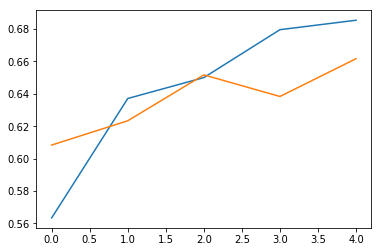

In [141]:
print(history.history.keys())
plt.plot(history.history['acc'], label="acc")
plt.plot(history.history['val_acc'], label="val_acc")


In [142]:
metrics = model.evaluate(xv, yv_one_hot)
print ('\nMetrics\n')
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))

480/500 [===========================>..] - ETA: 0s
Metrics

loss: 0.5796202931404114
acc: 0.7080000009536743


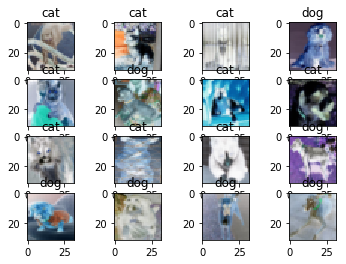

In [55]:
import random
test_l = 20
test_vis = []
for n in range(test_l):
    test_vis.append(xv[random.randint(0, 500)])

test_vis = np.array(test_vis)
preds = np.argmax(model.predict(test_vis), axis=1)

test_vis = test_vis * 128
test_vis = test_vis + 128

f, g = plt.subplots(4,4)
for i in range(4):
    for c in range(4):
        n = i*4+c
        g[i,c].imshow(test_vis[n])
        if preds[n] == 1 : title = 'cat'
        else : title = 'dog'
        g[i,c].set_title(title)
        

